### Optimization

`Optimization is the process of finding the most optimal value from a set of values, with regard to some criterion`. It can be the either `maximizing or minimizing the output of a real function`. Currently, the optimization area is very demanded, and the researchers are being interested in for centuries. `All functions have minimal and maximum value, whether globally or locally`. Optimization area is concentrated exactly on finding those critical values.


### Meta-heuristics

A meta-heuristics is a procedure designed to generate a search algorithm that may provide a sufficiently good solution to an optimization problem, `Meta-heuristics do not always find globally optimal solution.` By searching over a large set of solutions (individuals inside the population), `meta-heuristics can often find good solutions` with little computational effort.


# Imports

In [1]:
import math
import numpy as np
import random as rn
from numpy.random import uniform as rnd, normal as rndn, choice
from matplotlib import pyplot as plt
import time
from sklearn.linear_model import LogisticRegression
import pandas as pd

Class bcolors serves to print text in different colors.

How to to this?
 - print ( color attribute (bcolors.HEADER) + text )

In [2]:
class bcolors:
  HEADER = '\033[95m'
  OKBLUE = '\033[94m'
  OKCYAN = '\033[96m'
  OKGREEN = '\033[92m'
  WARNING = '\033[93m'
  FAIL = '\033[91m'
  ENDC = '\033[0m'
  BOLD = '\033[1m'
  UNDERLINE = '\033[4m'

# Benchmark functions


### Benchmark function

There are mathematical functions that are often used to be optimized by optimization algorithms. In this project, there are used following functions:

 * Ackley - $ f(x) = -a \ exp(-b \ \sqrt{ \frac {1} d \ \sum_{i=1}^{d} x_i^2 } ) - exp(\frac {1} d \ \sum_{i=1}^{d} cos(c \ x_i) ) + a + exp(1) $

 * Rastrigin - $ f(x) = 10 \ d + \sum_{i=1}^{d} [x_i^2 - 10 \ cos(2 \ \pi \ x_i)] $

 * Rosenbrock - $ f(x) = \sum_{i=1}^{d-1} [100 \ (x_{i+1} - x_i^2)^2 + (x_i - 1)^2 ] $

 * Schwefel - $ f(x) = 418.9829 \ d - \sum_{i=1}^{d} x_i \ sin(\sqrt{\left\lvert x_i \right\rvert}) $

 * Default - $ f(x) = \sum_{i=1}^{d} x_i^2 $

In [3]:
class Function:
  """ 
    constructor sets the functions got as a parameter, 
    if there is no such available function, then default function will be set 
  """
  def __init__(self, fnc=None):
    self.d = Config.get_dimension()

    benchmarks = {
      'Ackley': self.Ackley,
      'Rastrigin': self.Rastrigin,
      'Rosenbrock': self.Rosenbrock,
      'Schwefel': self.Schwefel,
      'Default': self.def_fnc
    }

    if fnc is None or fnc not in benchmarks:
      self.func_name = 'Default'
      self.f = benchmarks[self.func_name]
    else:
      self.func_name = fnc
      self.f = benchmarks[self.func_name]
    
    print('*' * 25 + ' ' + self.func_name + ' function is set to optimize ' + '*' * 25)

  def compute(self, vector):
    return self.f(vector)

  def Ackley(self, vector):
    a = 20
    b = 0.2
    c = 2 * np.pi

    term_1 = sum(vector ** 2)
    term_2 = sum(np.cos(c * vector))

    f = -a * np.exp(-b * np.sqrt(term_1)) - np.exp(term_2) + a + np.exp(1)

    return f

  def Rastrigin(self, vector):
    c = 2 * np.pi

    term = sum(vector ** 2 - 10 * np.cos(c * vector))

    f = 10 * self.d + term
      
    return f

  def Rosenbrock(self, vector):
    sum = 0

    # print(vector)

    for i in range(1, self.d-1):
      sum += 100 * (vector[i+1] - vector[i] ** 2) ** 2 + (vector[i] - 1) ** 2   

    return sum

  def Schwefel(self, vector):
    
    term = sum(vector * np.sin(np.sqrt(np.absolute(vector))))
    
    f = 418.9829 * self.d - term

    return f

  def def_fnc(self, vector):
    return sum(vector**2.0)

# Config

All optimization algorithms have a lot of parameters that should be passed on before the execution, which are following:

 - `Function` - a mathematical function that the certain algorithm will optimize
 - `Population size` - the initial number of solutions that should be in the population
 - `Minimum population size` - each algorithm requires the this attribute to optimize the function without gettin errors
 - `Dimension` - the dimension of any solution
 - `Iteration` - the number of iterations (generations) to be run during the execution
 - `DomainLowerBound / DomainUpperBound` - the boundaries for solutions to generate the random values inside
 - `MaxFes` - the maximum number of function evaluations per execution 

There are 2 methods to store all parameters globally inside the class:
 - By passing all parameters to class constructor in each instance creation
 - To set the parameters as class parameters, and only change them if needed by calling the classMethods, avoiding instance creation

In [4]:
class Config:
  function = None
  populationSize = 30
  minPopulationSize = 4
  dimension = 30
  iteration = 1000
  domainLowerBound = -1
  domainUpperBound = 1
  maxFes = 3000

  #----------------------------------------------------

  @classmethod
  def get_function(cls):
    return cls.function

  @classmethod
  def set_function(cls, function):
    cls.function = function

  #-----------------------------------------------------

  @classmethod
  def get_population_size(cls):
    return cls.populationSize

  @classmethod
  def set_population_size(cls, population_size):
    cls.populationSize = population_size

  #-----------------------------------------------------
  
  @classmethod
  def get_min_population_size(cls):
    return cls.minPopulationSize

  @classmethod
  def set_min_population_size(cls, min_population_size):
    cls.minPopulationSize = min_population_size

  #-----------------------------------------------------
  
  @classmethod
  def get_dimension(cls):
    return cls.dimension

  @classmethod
  def set_dimension(cls, dimension):
    cls.dimension = dimension

  #-----------------------------------------------------
  
  @classmethod
  def get_iteration(cls):
    return cls.iteration

  @classmethod
  def set_iteration(cls, iteration):
    cls.iteration = iteration

  #-----------------------------------------------------
  
  @classmethod
  def get_domain_lower_bound(cls):
    return cls.domainLowerBound

  @classmethod
  def set_domain_lower_bound(cls, domain_lower_bound):
    cls.domainLowerBound = domain_lower_bound

  #-----------------------------------------------------
  
  @classmethod
  def get_domain_upper_bound(cls):
    return cls.domainUpperBound

  @classmethod
  def set_domain_upper_bound(cls, domain_upper_bound):
    cls.domainUpperBound = domain_upper_bound

  #-----------------------------------------------------

  @classmethod
  def get_max_fes(cls):
    return cls.maxFes

  @classmethod
  def set_max_fes(cls, max_fes):
    cls.maxFes = max_fes

  #-----------------------------------------------------

# Global Variables

For some algorithms implemented, it is required to pass only one pair of main parameters (F and CR), but for some it is required to pass parameter pool - an array of parameter pair, so that they would be selected randomly.

For different functions, there are different boundaries

In [5]:
F = 0.5
CR = 0.7
parameter_candidate_pool = [[1.0, 0.1], [1.0, 0.9], [0.8, 0.2]]

In [6]:
available_function_settings = [
    {
        "name": "Ackley",
        "bounds": [-32, 32]
    },
    {
        "name": "Rastrigin",
        "bounds": [-5.12, 5.12]
    },
    {
        "name": "Rosenbrock",
        "bounds": [-30,30]
    },
    {
        "name": "Schwefel",
        "bounds": [-500,500]
    }
]

# Auxiliary Classes

class Vector serves as an Individual inside Population.

It has 2 attributes: 
 - `position` - an array of randomly generated values inside boundaries of size dimension
 - `fitness` - a value evaluated by certain benchmark function by passing position to the function

It has following methods:
  - `generate_vector()` - a method to set the position to a randomly generated values array and fitness value after evaluated the position by the function
  - `get_position()` - a method to get the position of an individual
  - `set_position()` - a method to set the position to an individual
  - `get_fitness()` - a method to get the fitness of an individual
  - `set_fitness()` - a method to set the fitness to an individual
  - `check_bounds()` - a method to check if the position array has values outside of boundaries, then to reset the certain values to boundary (lower or upper)

In [7]:
class Vector:

  def __init__(self):
    self.generate_vector()

  #-----------------------------------------------------

  def generate_vector(self):
    function = Config.get_function()
    dimension = Config.get_dimension()
    domain_lower_bound = Config.get_domain_lower_bound()
    domain_upper_bound = Config.get_domain_upper_bound()

    self.position = rnd(domain_lower_bound, domain_upper_bound, (dimension,))
    self.fitness = function.compute(self.position)

  #-----------------------------------------------------

  def get_position(self):
    return self.position

  def set_position(self, position):
    self.position = position

  #-----------------------------------------------------

  def get_fitness(self):
    return self.fitness

  def set_fitness(self, fitness):
    self.fitness = fitness  

  #-----------------------------------------------------

  def check_bounds(self):
    dimension = Config.get_dimension()
    domain_lower_bound = Config.get_domain_lower_bound()
    domain_upper_bound = Config.get_domain_upper_bound()

    # loop through the array of position
    for i in range(dimension):
      # if the value is less than lower bound, then set the value to lower bound
      if self.position[i] < domain_lower_bound:
        self.position[i] = domain_lower_bound
      
      # if the value is greater than upper bound, then set the value to upper bound
      if self.position[i] > domain_upper_bound:
        self.position[i] = domain_upper_bound

# DE

Differential Evolution class is a class to be inherited by main algorithm classes, as it has the common methods from the algorithm classes, which are following:

 - `initialization()` - the first stage of a DE algorithm, which serves to create the population, to get the best individual in the population, the best fitness inside the population, and to set best results and average results to an empy array
 - `get_random_individuals()` - the method to get random individuals from the population except the current individual
 - `total_evaluation()` - at the end of an each generation (iteration), the best value in the population is added to best results array, so that at the end of an execution, it would be visualized 
 - `visualize()` - the method to visualize the best and average values after the execution, to see the evoluation of the optimal values after generations

In [8]:
class DE:

  """ class constructor, which sets the current iteration to 0"""
  def __init__(self):
    self.cur_iter = 0

  """ initialization method, creates the population with randomly generated individuals, finds the best individual with its fitness value"""
  def initialization(self):

    # create the population
    self.p = []

    for i in range(Config.get_population_size()):
      self.p.append(Vector())

    # sort the population by fitness value asc
    self.p = sorted(self.p, key=lambda individual: individual.get_fitness())

    # get the best individual
    self.BestPosition = self.p[0].get_position()

    # get the best fitness value
    self.BestFitness = self.p[0].get_fitness()
    self.PrevBestFitness = self.BestFitness

    # an arrays to store best values of each generation, and the average values of each generation, if best vector is updated
    self.BestResults = []
    self.AverageResults = []

  """method to get random individuals from population except the current individual"""
  def get_random_individuals(self, current_population_size, current_index, num_of_vectors):
    candidates = [cand for cand in range(current_population_size) if cand != current_index]
    idx = choice(candidates, num_of_vectors, replace=False)
    return [self.p[i] for i in idx]


  """method to get the best individual at the end of each generation"""
  def total_evaluation(self):
    # sort the population by fitness value asc
    temp = sorted(self.p, key=lambda individual: individual.get_fitness())

    # get the best fitness value
    self.BestFitness = temp[0].get_fitness()


    # if best fitness value is less than global best
    if self.BestFitness < self.PrevBestFitness:
      self.BestPosition = temp[0].get_position()
      self.PrevBestFitness = self.BestFitness
      self.BestResults.append(self.BestFitness)
    
  """ method to visualize the best and average values at the end of execution"""
  def visualize(self):
    plt.plot(self.BestResults)
    plt.plot(self.AverageResults)
    plt.legend()
    plt.xlabel('Iterations')
    plt.ylabel('Objective Function Value')
    plt.show()

# SDE


Standard Differential Evolution Algorithm

Stages:
 - initialization
 - mutation
 - crossover
 - evaluation


 Generation Scheme: $ mutant = x_{R1} + F \ ( x_{R2} - x_{R3}) $  - DE/rand/1

In [9]:
class SDE(DE):

  """ constructor sets F and CR passed to it as instance attributes, and checks the parameters to be inside their boundaries"""
  def __init__(self, f, cr):
    super().__init__()
    self.f = f
    self.cr = cr

    population_size = Config.get_population_size()

    if population_size < 4:
      print('The population size must be equal or greater than 4!')  
      return

    if f < 0 or f > 2:
      print('The mutation factor must be between 0 and 2!')  
      return

    if cr < 0 or f > 1:
      print('The crossover probability must be between 0 and 1!')  
      return
    
    self.launch()
  
  """this stage calls the inherited from DE class method called initialization"""
  def initialization(self):
    super().initialization()

  """ generation method serves to find random individuals from population except the current individual"""
  def generation(self):
    self.x_i = self.p[self.cur_index]
    self.random_vectors = super().get_random_individuals(Config.get_population_size(), self.cur_index, 3)

  """mutation method serves to generate the mutant vector by using the generation scheme"""  
  def mutation(self):
    [a, b, c] = self.random_vectors

    self.v_i = Vector()
    self.v_i.set_position( a.get_position() + self.f * ( b.get_position() - c.get_position() ) )

  """crossover method serves to generate trial vector checking the condition to set either mutant vector cell or current individual cell to certain cell"""
  def crossover(self):
    u_i = Vector()

    dimension = Config.get_dimension()

    # generates random value from 0 to dimension size value
    j_rand = rn.randrange(0, dimension)

    for j in range(dimension):
      if self.x_i.position[j] < self.cr or j == j_rand:
        u_i.position[j] = self.v_i.position[j]
      else:
        u_i.position[j] = self.x_i.position[j]

    self.u_i = u_i

  """evaluation method serves to update the population in case the trial vector has a better (less) fitness value than current individual"""
  def evaluation(self):
    function = Config.get_function()
    
    TargetFitness = function.compute(self.x_i.get_position())
    TrialFitness = function.compute(self.u_i.get_position())

    if TrialFitness < TargetFitness:
      self.p[self.cur_index].set_position(self.u_i.get_position())
      self.p[self.cur_index].set_fitness(TrialFitness)
  
  """launch method serves as an execution method, calling all methods as algorithm should be executed"""
  def launch(self):
    self.initialization()

    print(bcolors.OKGREEN + '-' * 25 + bcolors.ENDC)

    for i in range(Config.get_iteration()):
      self.cur_iter = i 
      for j in range(Config.get_population_size()):
        self.cur_index = j
        self.generation()
        self.mutation()
        self.crossover()
        self.evaluation()

      super().total_evaluation()

      print('Iteration: %d --> f([%s]) = %.5f' % (self.cur_iter + 1, np.around(self.BestPosition, decimals=5), self.BestFitness))

    super().visualize()
    print(bcolors.OKGREEN + "-" * 25 + bcolors.ENDC)

In [10]:
fnc = Function(fnc=available_function_settings[2]["name"])
bounds = available_function_settings[2]["bounds"]

Config.set_function(fnc)
Config.set_domain_lower_bound(bounds[0])
Config.set_domain_upper_bound(bounds[1])

************************* Rosenbrock function is set to optimize *************************


-------------------------
Iteration: 1 --> f([[ -0.26463  -7.20626   9.12948 -13.76146  11.96832   8.34789 -19.89758
  16.77955  -9.29146   4.63449  -7.65712  12.47406  -4.20505   7.20454
 -11.31692  15.27244 -13.41123  18.57517 -12.49345 -18.58518  23.55056
   6.3543   12.53968  -2.85505  13.06776  13.45763  25.95929  23.70301
 -12.54687 -17.93493]]) = 185740283.53752
Iteration: 2 --> f([[ -0.26463  -7.20626   9.12948 -13.76146  11.96832   8.34789 -19.89758
  16.77955  -9.29146   4.63449  -7.65712  12.47406  -4.20505   7.20454
 -11.31692  15.27244 -13.41123  18.57517 -12.49345 -18.58518  23.55056
   6.3543   12.53968  -2.85505  13.06776  13.45763  25.95929  23.70301
 -12.54687 -17.93493]]) = 185740283.53752
Iteration: 3 --> f([[ -0.26463  -7.20626   9.12948 -13.76146  11.96832   8.34789 -19.89758
  16.77955  -9.29146   4.63449  -7.65712  12.47406  -4.20505   7.20454
 -11.31692  15.27244 -13.41123  18.57517 -12.49345 -18.58518  23.55056
   6.3543   12.53968  -2.85505  13.06776  13.4576

No handles with labels found to put in legend.



Iteration: 991 --> f([[6.45061 1.02205 1.03085 1.03093 1.05162 1.03862 1.02678 1.0419  1.03081
 1.02532 1.02251 1.04358 1.03018 1.02084 1.02553 1.02995 1.02299 1.03883
 1.03296 1.03736 1.03744 1.03054 1.04633 1.06649 1.10197 1.14887 1.26758
 1.53409 2.29216 5.28683]]) = 6.81859
Iteration: 992 --> f([[6.45061 1.02205 1.03085 1.03093 1.05162 1.03862 1.02678 1.0419  1.03081
 1.02532 1.03026 1.04358 1.03018 1.02084 1.02553 1.02995 1.02299 1.03883
 1.03296 1.03736 1.03744 1.03054 1.04633 1.06649 1.10197 1.14887 1.26758
 1.53409 2.29216 5.28683]]) = 6.81190
Iteration: 993 --> f([[6.45061 1.01465 1.03085 1.03093 1.05162 1.03862 1.02678 1.0419  1.03081
 1.02532 1.03026 1.04358 1.03018 1.02084 1.02553 1.02995 1.02299 1.03883
 1.03296 1.03736 1.03744 1.03054 1.04633 1.06649 1.10197 1.14887 1.26758
 1.53409 2.29216 5.28683]]) = 6.79293
Iteration: 994 --> f([[6.45061 1.01465 1.03085 1.03093 1.05162 1.03862 1.02678 1.0419  1.03081
 1.02532 1.03026 1.04358 1.03018 1.02084 1.02553 1.02995 1.02299 1.

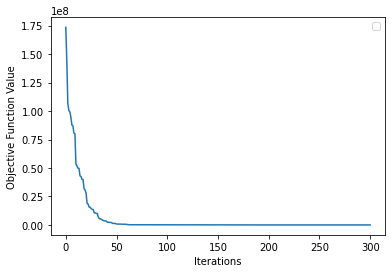

-------------------------


In [11]:
start = time.time()
sde = SDE(F, CR)
end = time.time()

In [12]:
print(f"Time taken for SDE to find the most optimal value is {end - start} seconds")

Time taken for SDE to find the most optimal value is 13.07326865196228 seconds


# CODE

Composite Differential Evolution Algorithm

Stages:
 - initialization
 - mutation
 - crossover
 - evaluation


 Generation Schemes: 
  - $ mutant = \sum_{i=0}^{d} x_{R3} + F \ (x_{R1} - x_{R2}) $ - rand/1/bin
  - $ mutant = \sum_{i=0}^{d} x_{R1}[i] + F \ ( x_{R2}[i] - x_{R3}[i] ) + F \ (x_{R4}[i] - x_{R5}[i]) $ - rand/2/bin
  - $ mutant = x_i + rnd(0,1) \ ( x_{R1} - x_i ) + F \ ( x_{R2} - x_{R3} ) $ - current-to-rand/1


In [13]:
class CODE(DE):

  """ constructor sets parameter pool passed to it as instance attributes"""
  def __init__(self, parameter_candidate_pool):
    super().__init__()
    self.parameter_candidate_pool = parameter_candidate_pool
    self.launch()
  
  """this stage calls the inherited from DE class method called initialization"""
  def initialization(self):
    super().initialization()

  """"generation scheme rand/1/bin"""
  def rand_1_bin(self):
    [f, cr] = self.parameter_candidate_pool[0]

    vectors = super().get_random_individuals(Config.get_population_size(), self.cur_index, 3)

    u_i_1_g = Vector()

    dimension = Config.get_dimension()
    function = Config.get_function()

    cutPoint = rn.randint(0, dimension-1)

    for i in range(dimension):
      if i == cutPoint or rnd(0,1) < cr:
        u_i_1_g.position[i] = vectors[2].position[i] + f * ( vectors[0].position[i] - vectors[1].position[i] )
      else:
        u_i_1_g.position[i] = self.p[self.cur_index].position[i]

    u_i_1_g.check_bounds()

    u_i_1_g.set_fitness(function.compute(u_i_1_g.get_position()))

    self.trialVectors.append(u_i_1_g)

  """"generation scheme rand/2/bin"""
  def rand_2_bin(self):
    [f, cr] = self.parameter_candidate_pool[1]

    vectors = super().get_random_individuals(Config.get_population_size(), self.cur_index, 5)

    u_i_2_g = Vector()

    dimension = Config.get_dimension()
    function = Config.get_function()

    cutPoint = rn.randint(0, dimension-1)

    for i in range(dimension):
      if i == cutPoint or rnd(0,1) < cr:
        u_i_2_g.position[i] = vectors[0].position[i] + f * ( vectors[1].position[i] - vectors[2].position[i] ) + f * ( vectors[3].position[i] - vectors[4].position[i] )
      else:
        u_i_2_g.position[i] = self.p[self.cur_index].position[i]

    u_i_2_g.check_bounds()

    u_i_2_g.set_fitness(function.compute(u_i_2_g.get_position()))
    self.trialVectors.append(u_i_2_g)

  """"generation scheme current-to-best/1/"""
  def current_to_rand_1(self):
    vectors = super().get_random_individuals(Config.get_population_size(), self.cur_index, 3)

    [f, cr] = self.parameter_candidate_pool[2]

    function = Config.get_function()

    u_i_3_g = Vector()
    cur_ind = self.p[self.cur_index]

    u_i_3_g.set_position( cur_ind.get_position() + rnd(0,1) * ( vectors[0].get_position() - cur_ind.get_position() ) + f * ( vectors[1].get_position() - vectors[2].get_position() ) )
    u_i_3_g.check_bounds()

    u_i_3_g.set_fitness(function.compute(u_i_3_g.get_position()))

    self.trialVectors.append(u_i_3_g)

  """ generation method serves to call the generation schemes"""
  def generation(self):
    self.trialVectors = []
    self.rand_1_bin()
    self.rand_2_bin()
    self.current_to_rand_1()

  """evaluation method serves to update the population in case the trial vector has a better (less) fitness value than current individual"""
  def evaluation(self):
    trialVectors = sorted(self.trialVectors, key=lambda individual: individual.get_fitness())

    trialPosition = trialVectors[0].get_position()
    trialFitness = trialVectors[0].get_fitness()

    targetFitness = self.p[self.cur_index].get_fitness()

    if trialFitness <= targetFitness:
      self.p[self.cur_index].set_position(trialPosition)
      self.p[self.cur_index].set_fitness(trialFitness)

  """launch method serves as an execution method, calling all methods as algorithm should be executed"""
  def launch(self):
    self.initialization()

    max_fes = Config.get_max_fes()
    iterations = Config.get_iteration()
    population_size = Config.get_population_size()

    print(bcolors.OKGREEN + '-' * 25 + bcolors.ENDC)
    
    self.cur_iter = 1  

    fes = population_size
    
    while fes < max_fes:
      for i in range(population_size):
        self.cur_index = i
        self.generation()
        self.evaluation()

      fes += 3
      self.cur_iter += 1  
      
      super().total_evaluation()

      print('Iteration: %d --> f([%s]) = %.5f' % (self.cur_iter, np.around(self.BestPosition, decimals=5), self.BestFitness))
    
    super().visualize()
    print(bcolors.OKGREEN + "-" * 25 + bcolors.ENDC)

In [14]:
fnc = Function(fnc=available_function_settings[2]["name"])
bounds = available_function_settings[2]["bounds"]

Config.set_function(fnc)
Config.set_domain_lower_bound(bounds[0])
Config.set_domain_upper_bound(bounds[1])

************************* Rosenbrock function is set to optimize *************************


Streaming output truncated to the last 5000 lines.
  -2.53407  16.47402 -12.33716   0.95132  17.01863 -15.34382  -0.62535
  12.68885  -2.88343   6.72418 -14.06411   8.17304   2.41087  -0.68679
   9.4915    9.57887 -15.77886  10.74592  -8.42991   2.51004  -5.5986
 -10.7466   -9.10669]]) = 45407145.88451
Iteration: 51 --> f([[-16.0591    2.96138  -5.32936  -7.34386  -2.57945  14.48313   5.65815
   8.33188   7.6725  -12.31459  -4.3623   -0.94639  -3.29539  16.26764
   2.35424   9.83115  -4.03346  -2.72743  -2.89613   5.02047  -7.21669
   2.21393  -3.31813 -20.315     2.07429  -3.36836  -3.60464  16.32176
   0.95591  30.     ]]) = 40485988.44553
Iteration: 52 --> f([[ 30.        6.21981  -4.71405  -5.96514   9.58822  10.48445  -2.34358
 -12.01247   2.79521  -2.33374  -8.69926   4.2843  -12.90516 -11.95404
  -7.3162   11.19807  -6.77109 -14.71159  -3.16272   5.01402 -18.3353
   5.16514  -0.03812   5.36208  -4.28537  -1.04291   8.08691  -4.08006
   0.88901 -30.     ]]) = 29466442.06901
Itera

No handles with labels found to put in legend.


Iteration: 987 --> f([[-1.769019e+01  4.583300e-01  3.280000e-01  8.272000e-02 -4.543000e-02
  3.120000e-03  4.075000e-02  1.248100e-01  4.443000e-02 -1.378600e-01
  1.870000e-02 -7.383000e-02 -1.115800e-01  1.523900e-01  1.182700e-01
 -4.068000e-02 -1.344000e-02 -5.509000e-02  9.341000e-02  9.669000e-02
  5.594000e-02  1.098200e-01 -4.482000e-02  8.380000e-03  4.499000e-02
  1.173000e-02 -5.116000e-02 -9.249000e-02  1.185400e-01  4.992000e-02]]) = 42.84541
Iteration: 988 --> f([[-1.769019e+01  4.583300e-01  3.280000e-01  8.272000e-02 -4.543000e-02
  3.120000e-03  4.075000e-02  1.248100e-01  4.443000e-02 -1.378600e-01
  1.870000e-02 -7.383000e-02 -1.115800e-01  1.523900e-01  1.182700e-01
 -4.068000e-02 -1.344000e-02 -5.509000e-02  9.341000e-02  9.669000e-02
  5.594000e-02  1.098200e-01 -4.482000e-02  8.380000e-03  4.499000e-02
  1.173000e-02 -5.116000e-02 -9.249000e-02  1.185400e-01  4.992000e-02]]) = 42.84541
Iteration: 989 --> f([[-1.769019e+01  4.583300e-01  3.280000e-01  8.272000e-

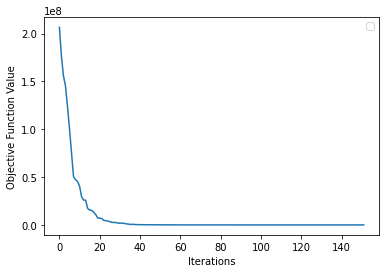

-------------------------


In [36]:
start = time.time()
code = CODE(parameter_candidate_pool)
end = time.time()

In [37]:
print(f"Time taken for CODE to find the most optimal value is {end - start} seconds")

Time taken for CODE to find the most optimal value is 29.33429217338562 seconds


# JDE

In [17]:
class JDE(DE):

  """ constructor sets F and CR passed to it as instance attributes, and checks the parameters to be inside their boundaries"""
  def __init__(self, f, cr):
    super().__init__()
    self.f = f
    self.cr = cr

    population_size = Config.get_population_size()

    if population_size < 4:
      print('The population size must be equal or greater than 4!')  
      return

    if f < 0 or f > 2:
      print('The mutation factor must be between 0 and 2!')  
      return

    if cr < 0 or f > 1:
      print('The crossover probability must be between 0 and 1!')  
      return
    
    self.FLower = 0.1
    self.FUpper = 0.9
    self.Probability = 0.1

    self.launch()
  
  """this stage calls the inherited from DE class method called initialization"""
  def initialization(self):
    super().initialization()

  """ generation method serves to find random individuals from population except the current individual"""
  def generation(self):
    self.x_i = self.p[self.cur_index]
    self.random_vectors = super().get_random_individuals(Config.get_population_size(), self.cur_index, 3)

  """mutation method serves to generate the mutant vector by using the generation scheme""" 
  def mutation(self):
    [a, b, c] = self.random_vectors

    self.v_i = Vector()
    self.v_i.set_position( a.get_position() + self.f * ( b.get_position() - c.get_position() ) )

  """crossover method serves to generate trial vector checking the condition to set either mutant vector cell or current individual cell to certain cell"""
  def crossover(self):
    u_i = Vector()

    dimension = Config.get_dimension()

    j_rand = rn.randrange(0, dimension)

    for j in range(dimension):
      if self.x_i.position[j] < self.cr or j == j_rand:
        u_i.position[j] = self.v_i.position[j]
      else:
        u_i.position[j] = self.x_i.position[j]

    self.u_i = u_i

  """evaluation method serves to update the population in case the trial vector has a better (less) fitness value than current individual"""
  def evaluation(self):
    function = Config.get_function()
    
    TargetFitness = function.compute(self.x_i.get_position())
    TrialFitness = function.compute(self.u_i.get_position())

    if TrialFitness < TargetFitness:
      self.p[self.cur_index].set_position(self.u_i.get_position())
      self.p[self.cur_index].set_fitness(TrialFitness)

  """method to set the parameters to randomly generated value inside the boundaries depending on condition"""
  def parameter_setter(self):
    if rnd() < self.Probability:
      self.f = self.FLower + rnd() * self.FUpper

    if rnd() < self.Probability:
      self.cr = rnd()

  """launch method serves as an execution method, calling all methods as algorithm should be executed"""
  def launch(self):
    self.initialization()

    print(bcolors.OKGREEN + '-' * 25 + bcolors.ENDC)

    for i in range(Config.get_iteration()):
      self.cur_iter = i 
      for j in range(Config.get_population_size()):
        self.cur_index = j
        self.generation()
        self.parameter_setter()
        self.mutation()
        self.crossover()
        self.evaluation()

      super().total_evaluation()

      print('Iteration: %d --> f([%s]) = %.5f' % (self.cur_iter + 1, np.around(self.BestPosition, decimals=5), self.BestFitness))

    super().visualize()
    print(bcolors.OKGREEN + "-" * 25 + bcolors.ENDC)

In [18]:
fnc = Function(fnc=available_function_settings[2]["name"])
bounds = available_function_settings[2]["bounds"]

Config.set_function(fnc)
Config.set_domain_lower_bound(bounds[0])
Config.set_domain_upper_bound(bounds[1])

************************* Rosenbrock function is set to optimize *************************


-------------------------
Iteration: 1 --> f([[ 24.79771   4.49489   1.30346 -25.68182 -13.96326  -1.76393   9.63765
 -10.05302  29.79579   0.27968  -9.88157  14.07889  25.62748 -11.94981
   8.08743  23.22596  15.61435  16.47576  -0.36446  11.45179  24.2053
  26.28049   9.40406  -5.83178  14.2949   -2.56763 -18.94734  10.46211
  19.94167   6.23884]]) = 332513641.93035
Iteration: 2 --> f([[ 24.79771   4.49489   1.30346 -25.68182 -13.96326  -1.76393   9.63765
 -10.05302  29.79579   0.27968  -9.88157  14.07889  25.62748 -11.94981
   8.08743  23.22596  15.61435  16.47576  -0.36446  11.45179  24.2053
  26.28049   9.40406  -5.83178  14.2949   -2.56763 -18.94734  10.46211
  19.94167   6.23884]]) = 332513641.93035
Iteration: 3 --> f([[ 24.79771   4.49489   1.30346 -25.68182 -13.96326  -1.76393   9.63765
 -10.05302  29.79579   0.27968  -9.88157  14.07889  25.62748 -11.94981
   8.08743  23.22596  15.61435  16.47576  -0.36446  11.45179  24.2053
  26.28049   9.40406  -5.83178  14.2949   -2.56763 -

No handles with labels found to put in legend.


Iteration: 998 --> f([[14.70585  1.01566  1.01532  1.018    1.03085  1.03465  1.03579  1.03607
  1.02575  1.01948  1.01657  1.01704  1.01932  1.0116   1.0269   1.04001
  1.04651  1.06911  1.0447   1.03928  1.03465  1.02802  1.04317  1.06682
  1.12153  1.21337  1.46557  2.13953  4.62412 21.16138]]) = 22.87638
Iteration: 999 --> f([[14.70585  1.01566  1.01532  1.018    1.03085  1.03465  1.03579  1.03607
  1.02575  1.01948  1.01657  1.01704  1.01932  1.0116   1.0269   1.04001
  1.04651  1.06911  1.0447   1.03928  1.03465  1.02802  1.04317  1.06682
  1.12153  1.21337  1.46557  2.13953  4.62412 21.16138]]) = 22.87638
Iteration: 1000 --> f([[14.70585  1.01566  1.01532  1.018    1.03085  1.03465  1.03579  1.03607
  1.02575  1.01948  1.01657  1.01704  1.01932  1.0116   1.0269   1.04001
  1.04651  1.06911  1.0447   1.03928  1.03465  1.02802  1.04317  1.06682
  1.12153  1.21337  1.46557  2.13953  4.62412 21.16138]]) = 22.87638


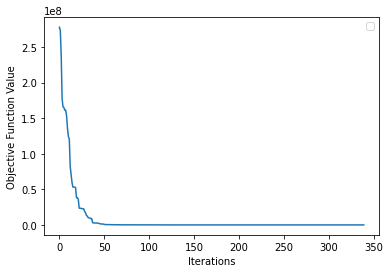

-------------------------


In [19]:
start = time.time()
sde = JDE(F, CR)
end = time.time()

In [20]:
print(f"Time taken for JDE to find the most optimal value is {end - start} seconds")

Time taken for JDE to find the most optimal value is 13.640329837799072 seconds


# JADE

In [21]:
class JADE(DE):

  """ constructor sets F and CR passed to it as instance attributes, and checks the parameters to be inside their boundaries"""
  def __init__(self, f, cr):
    super().__init__()
    self.f = f
    self.cr = cr

    population_size = Config.get_population_size()

    if population_size < 4:
      print('The population size must be equal or greater than 4!')  
      return

    if f < 0 or f > 2:
      print('The mutation factor must be between 0 and 2!')  
      return

    if cr < 0 or f > 1:
      print('The crossover probability must be between 0 and 1!')  
      return
    
    self.FLower = 0.1
    self.FUpper = 0.9
    self.Probability = 0.1

    self.launch()
  
  """this stage calls the inherited from DE class method called initialization"""
  def initialization(self):
    super().initialization()

  """ generation method serves to find random individuals from population except the current individual"""
  def generation(self):
    self.x_i = self.p[self.cur_index]
    self.random_vectors = super().get_random_individuals(Config.get_population_size(), self.cur_index, 2)

  """mutation method serves to generate the mutant vector by using the generation scheme"""  
  def mutation(self):
    [a, b] = self.random_vectors

    bestIndividuals = sorted(self.p, key=lambda individual: individual.get_fitness())

    top_individuals_bound = math.ceil(Config.get_population_size() * rnd())
    top_individuals = bestIndividuals[:top_individuals_bound]

    candidates = [cand for cand in range(top_individuals_bound)]
    [idx] = choice(candidates, 1, replace=False)

    temp = top_individuals[idx]
    current_individual = self.p[self.cur_index]

    self.v_i = Vector()
    self.v_i.set_position( current_individual.get_position() + self.f * ( temp.get_position() - current_individual.get_position() ) + self.f * ( a.get_position() - b.get_position() ) )

  """crossover method serves to generate trial vector checking the condition to set either mutant vector cell or current individual cell to certain cell"""
  def crossover(self):
    u_i = Vector()

    dimension = Config.get_dimension()

    j_rand = rn.randrange(0, dimension)

    for j in range(dimension):
      if self.x_i.position[j] < self.cr or j == j_rand:
        u_i.position[j] = self.v_i.position[j]
      else:
        u_i.position[j] = self.x_i.position[j]

    self.u_i = u_i

  """evaluation method serves to update the population in case the trial vector has a better (less) fitness value than current individual"""
  def evaluation(self):
    function = Config.get_function()
    
    TargetFitness = function.compute(self.x_i.get_position())
    TrialFitness = function.compute(self.u_i.get_position())

    if TrialFitness < TargetFitness:
      self.p[self.cur_index].set_position(self.u_i.get_position())
      self.p[self.cur_index].set_fitness(TrialFitness)

  """method to set the parameters to randomly generated value inside the boundaries depending on condition"""
  def parameter_setter(self):
    if rnd() < self.Probability:
      self.f = self.FLower + rnd() * self.FUpper

    if rnd() < self.Probability:
      self.cr = rnd()

  """launch method serves as an execution method, calling all methods as algorithm should be executed"""
  def launch(self):
    self.initialization()

    print(bcolors.OKGREEN + '-' * 25 + bcolors.ENDC)

    for i in range(Config.get_iteration()):
      self.cur_iter = i 
      for j in range(Config.get_population_size()):
        self.cur_index = j
        self.generation()
        self.parameter_setter()
        self.mutation()
        self.crossover()
        self.evaluation()

      super().total_evaluation()

      print('Iteration: %d --> f([%s]) = %.5f' % (self.cur_iter + 1, np.around(self.BestPosition, decimals=5), self.BestFitness))

    super().visualize()
    print(bcolors.OKGREEN + "-" * 25 + bcolors.ENDC)

In [22]:
fnc = Function(fnc=available_function_settings[2]["name"])
bounds = available_function_settings[2]["bounds"]

Config.set_function(fnc)
Config.set_domain_lower_bound(bounds[0])
Config.set_domain_upper_bound(bounds[1])

************************* Rosenbrock function is set to optimize *************************


-------------------------
Iteration: 1 --> f([[ 14.68518   5.74387  -2.06561   7.2235   20.03311  14.12797   4.56876
  -6.31395  14.50975  10.52749  -4.56693  15.31229 -10.19829  20.80342
   7.7724   20.01392  -4.12741  16.20835   0.93168  -4.36989  -1.43822
   6.43875   2.48061   7.39473   1.49517  18.30412   0.26165  14.7784
   8.36698  18.78331]]) = 89044520.77259
Iteration: 2 --> f([[ 14.68518   5.74387  -2.06561   7.2235   20.03311  14.12797   4.56876
  -6.31395  14.50975  10.52749  -4.56693  15.31229 -10.19829  20.80342
   7.7724   20.01392  -4.12741  16.20835   0.93168  -4.36989  -1.43822
   6.43875   2.48061   7.39473   1.49517  18.30412   0.26165  14.7784
   8.36698  18.78331]]) = 89044520.77259
Iteration: 3 --> f([[ 14.68518   5.74387  -2.06561   7.2235   20.03311  14.12797   4.56876
  -6.31395  14.50975  10.52749  -4.56693  15.31229 -10.19829  20.80342
   7.7724   20.01392  -4.12741  16.20835   0.93168  -4.36989  -1.43822
   6.43875   2.48061   7.39473   1.49517  18.30412   

No handles with labels found to put in legend.


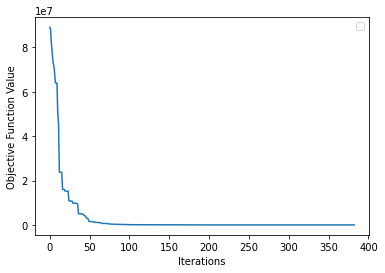

-------------------------


In [23]:
start = time.time()
jade = JADE(F, CR)
end = time.time()

In [24]:
print(f"Time taken for JADE to find the most optimal value is {end - start} seconds")

Time taken for JADE to find the most optimal value is 15.359793186187744 seconds


# Cuckoo Search

In [25]:
class Cuckoo():

  """ constructor sets parameters passed as parameters as instance attributes"""
  def __init__(self, _lambda, pa, step_size, trial):
    self.cur_iter = 0
    self._lambda = _lambda
    self.pa = pa
    self.step_size = step_size
    self.trial = trial

    self.launch()

  """ initialization method, creates the population with randomly generated individuals, finds the best individual with its fitness value"""
  def initialization(self):
    self.p = []

    for i in range(Config.get_population_size()):
      self.p.append(Vector())

    self.p = sorted(self.p, key=lambda individual: individual.get_fitness())

    self.BestPosition = self.p[0].get_position()
    self.BestFitness = self.p[0].get_fitness()
    self.PrevBestFitness = self.BestFitness
    self.BestResults = []
    self.AverageResults = []

  """ generation method serves to find random individuals from population except the current individual"""
  def generation(self):
    for i in range(Config.get_population_size()):
      self.p[i] = self.cuckoo(self.p[i])
      self.p[i].set_fitness(Config.get_function().compute(self.p[i].get_position()))

      j = i
      
      while j == i:
        j = np.random.randint(0, Config.get_population_size())

      if(self.p[i].get_fitness() < self.p[j].get_fitness()):
          self.p[j].set_position(self.p[i].get_position())
          self.p[j].set_fitness(self.p[i].get_fitness())

  """method that returns the step value calculated by the formula called levy flight"""
  def levy_flight(self):
    sigma1 = np.power((math.gamma(1 + self._lambda) * np.sin((np.pi * self._lambda) / 2)) / math.gamma((1 + self._lambda) / 2) * np.power(2, (self._lambda - 1) / 2), 1 / self._lambda)
    sigma2 = 1

    u = np.random.normal(0, sigma1, size=Config.get_dimension())
    v = np.random.normal(0, sigma2, size=Config.get_dimension())
    step = u / np.power(np.fabs(v), 1 / self._lambda)

    return step 

  """method that serves to get the step size returned from levy flight formula and reset the position of vector, and recheck the boundaries"""
  def cuckoo(self, vector):
    step_size = self.step_size * self.levy_flight()
    vector.set_position(vector.get_position() + step_size)
    vector.check_bounds()
    return vector

  """crossover method serves to generate trial vector checking the condition to set either mutant vector cell or current individual cell to certain cell"""
  def crossover(self):
    self.p = sorted(self.p, key=lambda individual: individual.get_fitness())
    
    for a in range(1, Config.get_population_size()):
      r = np.random.rand()
      if r < self.pa:
        for i in range(Config.get_dimension()):
          p = np.random.rand()
          if p < self.pa:
            self.p[a].position[i] = np.random.rand() * (Config.get_domain_upper_bound() - Config.get_domain_lower_bound())  + Config.get_domain_lower_bound()
      
        self.p[a].set_fitness(Config.get_function().compute(self.p[a].get_position()))

  """evaluation method serves to update the population in case the trial vector has a better (less) fitness value than current individual"""
  def evaluation(self):
    temp = sorted(self.p, key=lambda individual: individual.get_fitness())

    if temp[0].get_fitness() < self.BestFitness:
      self.BestFitness = temp[0].get_fitness()
      self.BestPosition = temp[0].get_position()

    self.BestResults.append(self.BestFitness)

  """ method to visualize the best and average values at the end of execution"""
  def visualize(self):
    plt.plot(self.BestResults)
    plt.plot(self.AverageResults)
    plt.legend()
    plt.xlabel('Iterations')
    plt.ylabel('Objective Function Value')
    plt.show()

  """launch method serves as an execution method, calling all methods as algorithm should be executed"""
  def launch(self):

    print(bcolors.OKGREEN + '-' * 25 + bcolors.ENDC)

    for trial in range(self.trial):
      np.random.seed(trial)
      self.initialization()

      for iteration in range(Config.get_iteration()):
        self.generation()
        self.crossover()
        self.evaluation()

        print('Trial: %d --> Iteration: %d --> f([%s]) = %.5f' % (trial, iteration, np.around(self.BestPosition, decimals=5), self.BestFitness))

    print(bcolors.OKGREEN + "-" * 25 + bcolors.ENDC)
    self.visualize()

In [26]:
_lambda = 1.5
pa = .25
step_size = 0.01
trial = 1

In [27]:
fnc = Function(fnc=available_function_settings[2]["name"])
bounds = available_function_settings[2]["bounds"]

Config.set_function(fnc)
Config.set_domain_lower_bound(bounds[0])
Config.set_domain_upper_bound(bounds[1])

************************* Rosenbrock function is set to optimize *************************


-------------------------
Trial: 0 --> Iteration: 0 --> f([[ 23.93319 -18.85534   1.95594 -10.43173 -11.00483  -3.16964  -4.04154
  -8.57513  24.88399  13.91682  13.65429 -12.59089   4.67834  16.75042
  17.80106  -9.32572  16.2451   14.1608  -21.51511  21.94391  -3.50247
  -0.8171   -3.29234   4.06411   7.27803  -0.12329  22.00203   7.6599
  -5.91071  -5.00161]]) = 157856083.73079
Trial: 0 --> Iteration: 1 --> f([[ 23.9458  -18.79588   1.96366 -10.49181 -10.97765  -3.15902  -4.01374
  -8.56864  24.87285  13.89258  13.64936 -12.59395   4.67537  16.72974
  17.81405  -9.35351  16.25035  14.16789 -21.5162   21.91774  -3.51242
  -0.82752  -3.26      4.08576   7.27729  -0.12507  22.02498   7.62915
  -5.93017  -4.98987]]) = 157630285.90164
Trial: 0 --> Iteration: 2 --> f([[ 23.94173 -18.80344   1.94444 -10.50343 -11.1171   -3.16001  -4.01093
  -8.58156  24.85434  13.92086  13.65775 -12.53403   4.67967  16.66685
  17.80753  -9.36656  16.26139  14.13582 -21.50839  21.92356  -3.56562
  -0.81784 

No handles with labels found to put in legend.


Trial: 0 --> Iteration: 978 --> f([[-4.49967e+00  8.61990e-01  7.09840e-01  6.04080e-01  2.14410e-01
  1.85320e-01 -1.00300e-01  2.01250e-01  1.09270e-01  5.45800e-02
  3.74740e-01  7.60000e-02 -1.24260e-01 -2.92000e-03  3.73920e-01
  5.07390e-01  1.66720e-01  2.24400e-02 -1.85800e-01  5.57760e-01
  3.47700e-01  8.01400e-01  7.52030e-01  3.14730e-01  2.60210e-01
  3.16020e-01  3.01780e-01  1.30870e-01 -1.88702e+00  4.15167e+00]]) = 575.05776
Trial: 0 --> Iteration: 979 --> f([[-4.49967e+00  8.61990e-01  7.09840e-01  6.04080e-01  2.14410e-01
  1.85320e-01 -1.00300e-01  2.01250e-01  1.09270e-01  5.45800e-02
  3.74740e-01  7.60000e-02 -1.24260e-01 -2.92000e-03  3.73920e-01
  5.07390e-01  1.66720e-01  2.24400e-02 -1.85800e-01  5.57760e-01
  3.47700e-01  8.01400e-01  7.52030e-01  3.14730e-01  2.60210e-01
  3.16020e-01  3.01780e-01  1.30870e-01 -1.88702e+00  4.15167e+00]]) = 575.05776
Trial: 0 --> Iteration: 980 --> f([[-4.7846   0.83884  0.76248  0.53146  0.3417   0.22078  0.5495   0.30955


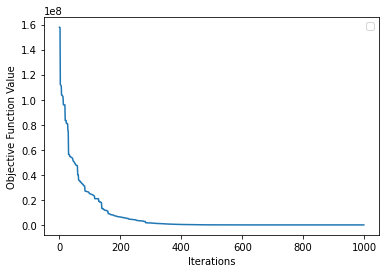

In [28]:
start = time.time()
cuckoo = Cuckoo(_lambda, pa, step_size, trial)
end = time.time()

In [29]:
print(f"Time taken for SDE to find the most optimal value is {end - start} seconds")

Time taken for SDE to find the most optimal value is 6.736376523971558 seconds


# SDE with ML techniques

In [30]:
class SDE_OPTIMAL(DE):

  """constructor that sets the train data object for each parameter (F, CR)"""
  def __init__(self):
    super().__init__()

    self.current_population_size = Config.get_population_size()

    self.train_mutation_factor = {
        "val": np.array([]),
        "isPromising": np.array([])
    }

    self.train_crossover_probability = {
        "val": np.array([]),
        "isPromising": np.array([])
    }

    self.launch()
    
  """this stage calls the inherited from DE class method called initialization"""
  def initialization(self):
    super().initialization()

  """ generation method serves to find random individuals from population except the current individual"""
  def generation(self):
    self.x_i = self.p[self.cur_index]
    self.random_vectors = super().get_random_individuals(self.current_population_size, self.cur_index, 3)

  """generate random parameters, and if the iteration is greater than 10, check if parameter is promising, if is not, regenerate until get promising"""
  def generate_params(self):
    self.f = rnd()
    self.cr = rnd(0, 2)
    
    if self.current_iteration > 9:
      while not self.check_isPromising('f'):
        self.f = rnd()

      while not self.check_isPromising('cr'):
        self.cr = rnd(0, 2) 

  """check if parameters are promising, by calling the predict method of this class, return boolean, true if promising, false otherwise"""
  def check_isPromising(self, parameter):
    if parameter == 'f':
      regression = self.f_regression
      test_data = {
        "val": np.array([self.f])
      }
    else:
      regression = self.cr_regression
      test_data = {
        "val": np.array([self.cr])
      }

    prediction = self.predict(test_data, regression)

    # print('is value {} for parameter {} promising? {} --> {}'.format(test_data, parameter, prediction, prediction[0] == 1))

    return prediction[0] == 1

  """method that by using logistic regression, predict the value randomly generated, if it is promising or not, trained before on a train data of certain parameter"""
  def predict(self, test_data, regression):
    test_df = pd.DataFrame(test_data)  
    x_test = test_df.iloc[:, :]
    prediction = regression.predict(x_test)  

    return prediction

  """method to train datasets on logistic regression for F and CR parameters"""
  def train_dataset(self):
    # mutation factor
    df =  pd.DataFrame(self.train_mutation_factor)

    x = df.iloc[:, : -1]
    y = df.iloc[:, -1]

    self.f_regression = LogisticRegression(solver='liblinear', random_state=0)
    self.f_regression.fit(x, y)

    # crossover probability
    df =  pd.DataFrame(self.train_crossover_probability)

    x = df.iloc[:, : -1]
    y = df.iloc[:, -1]

    self.cr_regression = LogisticRegression(solver='liblinear', random_state=0)
    self.cr_regression.fit(x, y)

  """algorithm to reduce the population, getting rid of certain part of worst individuals of population"""
  def reduce_population(self):
    min_population_size = Config.get_min_population_size()
    population_size = Config.get_population_size()
    iterations = Config.get_iteration()

    planned_population_size = round((((min_population_size - population_size) / iterations) * self.current_iteration) + population_size)
    
    if self.current_population_size > planned_population_size:
      reduction_population_size = self.current_population_size - planned_population_size
      
      if self.current_population_size - reduction_population_size < min_population_size:
        reduction_population_size = self.current_population_size - min_population_size
      
      bestIndividuals = sorted(self.p, key=lambda individual: individual.get_fitness())
      self.current_population_size = self.current_population_size - reduction_population_size      
      self.p = bestIndividuals[:self.current_population_size]

  """mutation method serves to generate the mutant vector by using the generation scheme""" 
  def mutation(self):
    [a, b, c] = self.random_vectors

    self.v_i = Vector()
    self.v_i.set_position( a.get_position() + self.f * ( b.get_position() - c.get_position() ) )

  """crossover method serves to generate trial vector checking the condition to set either mutant vector cell or current individual cell to certain cell"""
  def crossover(self):
    u_i = Vector()

    dimension = Config.get_dimension()

    j_rand = rn.randrange(0, dimension)

    for j in range(dimension):
      if self.x_i.position[j] < self.cr or j == j_rand:
        u_i.position[j] = self.v_i.position[j]
      else:
        u_i.position[j] = self.x_i.position[j]

    self.u_i = u_i

  """set the parameters as promising and add to train data for certain parameter"""
  def setIsPromising(self, isPromising):
    if self.current_iteration:
      self.train_mutation_factor['val'] = np.append(self.train_mutation_factor['val'], [self.f])
      self.train_mutation_factor['isPromising'] = np.append(self.train_mutation_factor['isPromising'], [isPromising])

      self.train_crossover_probability['val'] = np.append(self.train_crossover_probability['val'], [self.f])
      self.train_crossover_probability['isPromising'] = np.append(self.train_crossover_probability['isPromising'], [isPromising])

  """evaluation method serves to update the population in case the trial vector has a better (less) fitness value than current individual"""
  def evaluation(self):
    function = Config.get_function()
    
    TargetFitness = function.compute(self.x_i.get_position())
    TrialFitness = function.compute(self.u_i.get_position())

    if TrialFitness < TargetFitness:
      self.p[self.cur_index].set_position(self.u_i.get_position())
      self.p[self.cur_index].set_fitness(TrialFitness)

      if self.current_iteration < 9:
        self.setIsPromising(1)
    else:
      bestIndividuals = sorted(self.p, key=lambda individual: individual.get_fitness())

      current_individual_index = bestIndividuals.index(self.x_i)

      if current_individual_index < len(bestIndividuals) / 2:
        if self.current_iteration < 9:
          self.setIsPromising(1)
      else:
        if self.current_iteration < 9:
          self.setIsPromising(0)

  """launch method serves as an execution method, calling all methods as algorithm should be executed"""
  def launch(self):
    self.initialization()

    print(bcolors.OKGREEN + '-' * 25 + bcolors.ENDC)

    for i in range(Config.get_iteration()):
      self.current_iteration = i 
      
      if i == 9:
        self.train_dataset()
        
      for j in range(self.current_population_size):
        self.cur_index = j
        self.generation()
        self.generate_params()
        self.mutation()
        self.crossover()
        self.evaluation()

      super().total_evaluation()

      print('Iteration: %d --> f([%s]) = %.5f' % (self.current_iteration + 1, np.around(self.BestPosition, decimals=5), self.BestFitness))

      self.reduce_population()

    super().visualize()
    print(bcolors.OKGREEN + "-" * 25 + bcolors.ENDC)

In [31]:
fnc = Function(fnc=available_function_settings[2]["name"])
bounds = available_function_settings[2]["bounds"]

Config.set_function(fnc)
Config.set_domain_lower_bound(bounds[0])
Config.set_domain_upper_bound(bounds[1])

************************* Rosenbrock function is set to optimize *************************


-------------------------
Iteration: 1 --> f([[  4.66477 -21.03068  20.92687  17.16192 -10.53487   9.07658  21.268
  22.22433 -13.58677  17.44712  15.18099 -14.01702  13.85001   1.71146
  -6.62659   4.23845 -28.42869   5.70994  13.77859  15.89378  25.98879
   8.4802   -4.62165  12.27794  15.95296   4.20249 -17.65874   7.98912
   8.12434  13.55773]]) = 250599782.80887
Iteration: 2 --> f([[  4.66477 -21.03068  20.92687  17.16192 -10.53487   9.07658  21.268
  22.22433 -13.58677  17.44712  15.18099 -14.01702  13.85001   1.71146
  -6.62659   4.23845 -28.42869   5.70994  13.77859  15.89378  25.98879
   8.4802   -4.62165  12.27794  15.95296   4.20249 -17.65874   7.98912
   8.12434  13.55773]]) = 250599782.80887
Iteration: 3 --> f([[  6.14544 -18.33019  19.488    15.70998   7.60094  22.35733  17.20914
  13.74779   4.5047   25.90716  14.0203   15.20015   9.89526   5.14945
  16.91162   0.46454  -2.43025   2.35608  13.66802  13.21677  24.76495
   5.93046  18.20484   9.22064  16.22868  19.98367   

No handles with labels found to put in legend.


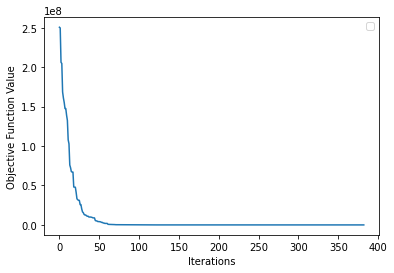

-------------------------


In [34]:
start = time.time()
sde = SDE_OPTIMAL()
end = time.time()

In [35]:
print(f"Time taken for SDE OPTIMAL to find the most optimal value is {end - start} seconds")

Time taken for SDE OPTIMAL to find the most optimal value is 87.98412799835205 seconds
